In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.size'] = 7
# rcParams['pdf.fonttype'] = 42
# rcParams['ps.fonttype'] = 42
# rcParams['svg.fonttype'] = 'none'


path_figures=Path().cwd().parent.parent/"figures"
path_figures.mkdir(parents=True, exist_ok=True)
path_benchmark_data=Path.cwd().parent.parent/"benchmark_for_test"
path_benchmark_data.mkdir(parents=True, exist_ok=True)

In [2]:
# Only record build and update in dynamic

library_size = 1_000_000

ion_mode = [-1,1]

add_size=1_000_000
mass_per_block=[0.05, 0.1, 0.5, 1]
step="update"

In [3]:
import matplotlib.ticker as ticker

df=[]
for charge in ion_mode:
    for mass in mass_per_block:
        data={"library_number":library_size,"add_size":add_size, "step":step, "mass_per_block":mass, "charge":charge}
        

        path_benchmark_specific_data_dynamic=path_benchmark_data/f"dynamic_fast_update_{charge}_{add_size}_added_to_{library_size}_memory_usage_{step}_step_options_{mass}_mass_per_block.txt"
                
        with open(path_benchmark_specific_data_dynamic,"r") as f1:
            for line in f1.readlines():
                items=line.split(":", maxsplit=1)
                key, value=items
                if key.strip()=="Maximum resident set size (kbytes)":
                    dynamic=int(value.strip())

        data["dynamic_entropy_search(fast_update)"]=dynamic/1048576
             
        df.append(pd.DataFrame([data]))
            
df=pd.concat(df)
df    


,library_number,add_size,step,mass_per_block,charge,dynamic_entropy_search(fast_update)
0,1000000,1000000,update,0.05,-1,3.907192
0,1000000,1000000,update,0.10,-1,3.906773
0,1000000,1000000,update,0.50,-1,3.901016
0,1000000,1000000,update,1.00,-1,3.902653
0,1000000,1000000,update,0.05,1,6.745613
0,1000000,1000000,update,0.10,1,6.734612
0,1000000,1000000,update,0.50,1,6.723522
0,1000000,1000000,update,1.00,1,6.740894


In [4]:

df_data = df[["mass_per_block", 
              "charge",
            "dynamic_entropy_search(fast_update)", 
            ]]

df_melted=df_data.melt(id_vars=["charge", "mass_per_block"], var_name="type", value_name="memory_usage")
df_melted


,charge,mass_per_block,type,memory_usage
0,-1,0.05,dynamic_entropy_search(fast_update),3.907192
1,-1,0.10,dynamic_entropy_search(fast_update),3.906773
2,-1,0.50,dynamic_entropy_search(fast_update),3.901016
3,-1,1.00,dynamic_entropy_search(fast_update),3.902653
4,1,0.05,dynamic_entropy_search(fast_update),6.745613
5,1,0.10,dynamic_entropy_search(fast_update),6.734612
6,1,0.50,dynamic_entropy_search(fast_update),6.723522
7,1,1.00,dynamic_entropy_search(fast_update),6.740894


/tmp/ipykernel_1394613/3147592843.py:20: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x="mass_per_block", y="memory_usage", hue="type", data=df_charge,


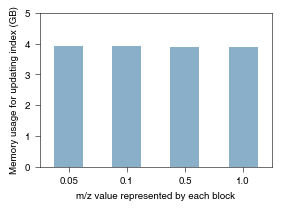

In [5]:
charge=-1
df_charge=df_melted[df_melted["charge"]==charge]
# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update)": color_palette_set2[4],
    
}
plt.figure(figsize=(3, 2))

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.4)  

ax.tick_params(axis='both', 
               which='both',
               width=0.4,
               )
    
sns.barplot(x="mass_per_block", y="memory_usage", hue="type", data=df_charge, 
            palette=color_palette, legend=False, width=0.5, errwidth=0)


# Set y-axis title
plt.ylabel(f"Memory usage for updating index (GB)")
plt.ylim(top=5)
if charge==-1:
    mode="-"
elif charge==1:
    mode='+'

plt.xlabel(f"m/z value represented by each block")


# Save figure
plt.savefig(path_figures / f"memory_usage_different_mass_{step}_step_{charge}_options_mass_per_block.svg", bbox_inches="tight", dpi=1200)

/tmp/ipykernel_1394613/1139637801.py:21: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x="mass_per_block", y="memory_usage", hue="type", data=df_charge,


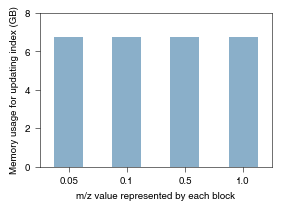

In [6]:
charge=1
df_charge=df_melted[df_melted["charge"]==charge]
# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update)": color_palette_set2[4],
    
}
plt.figure(figsize=(3, 2))

ax = plt.gca()

for spine in ax.spines.values():
    spine.set_linewidth(0.4)  

ax.tick_params(axis='both', 
               which='both',
               width=0.4,
               )
 
sns.barplot(x="mass_per_block", y="memory_usage", hue="type", data=df_charge, 
            palette=color_palette, legend=False, width=0.5, errwidth=0)


# Set y-axis title
plt.ylabel(f"Memory usage for updating index (GB)")
plt.ylim(top=8)
if charge==-1:
    mode="-"
elif charge==1:
    mode='+'

plt.xlabel(f"m/z value represented by each block")


# Save figure
plt.savefig(path_figures / f"memory_usage_different_mass_{step}_step_{charge}_options_mass_per_block.svg", bbox_inches="tight", dpi=1200)